In [1]:
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    %matplotlib inline
    from sklearn.linear_model import LinearRegression
    from scipy import stats
    
    cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
            'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
    
    data = pd.read_csv(r"C:\PythonScripts\housing.data",
                       sep=' +', engine='python', header=None, names=cols)
    data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
data1=data[['LSTAT','MEDV']].copy()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LSTAT   506 non-null    float64
 1   MEDV    506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


C:\Users\lilia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


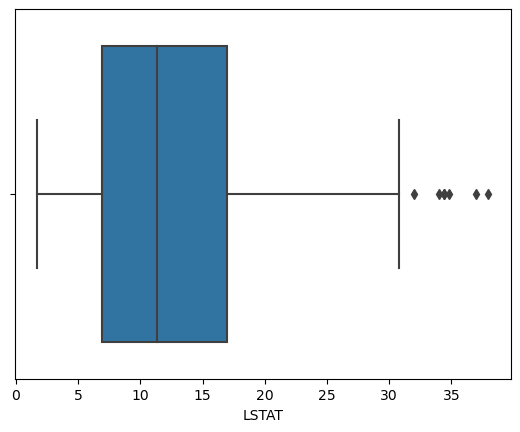

In [3]:
plt.figure()
sns.boxplot(data1['LSTAT'])
_=plt.plot()

In [4]:
X=data1['LSTAT'].values.reshape(-1,1)
y=data1['MEDV'].values
X[:5]

array([[4.98],
       [9.14],
       [4.03],
       [2.94],
       [5.33]])

In [5]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [6]:
lr1=LinearRegression()
lr1.fit(X, y)
lr1.score(X, y)

0.5441462975864799

In [7]:
z=np.abs(stats.zscore(data1))
z.head()

,LSTAT,MEDV
0,1.075562,0.159686
1,0.492439,0.101524
2,1.208727,1.324247
3,1.361517,1.182758
4,1.026501,1.487503


In [8]:
treshold=3
data1_o_z=data1[(z<treshold).all(axis=1)]
len(data1_o_z)

501

C:\Users\lilia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


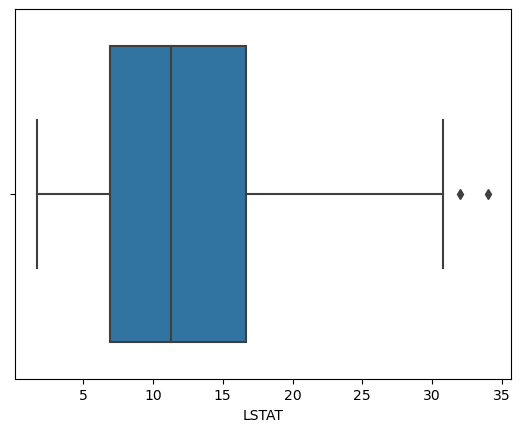

In [9]:
plt.figure()
sns.boxplot(data1_o_z['LSTAT'])
_=plt.plot()

In [10]:
X=data1_o_z['LSTAT'].values.reshape(-1,1)
y=data1_o_z['MEDV'].values
lr1_o_z=LinearRegression()
lr1_o_z.fit(X, y)
lr1_o_z.score(X, y)

0.561613442074578

In [11]:
Q1=data1.quantile(0.25)
Q3=data1.quantile(0.75)
IQR=Q3-Q1

In [12]:
outlier_condition=((data1<(Q1-1.5*IQR)) | (data1>(Q3+1.5*IQR)))
data1_o_iqr=data1[~outlier_condition.any(axis=1)]
len(data1_o_iqr)

459

C:\Users\lilia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


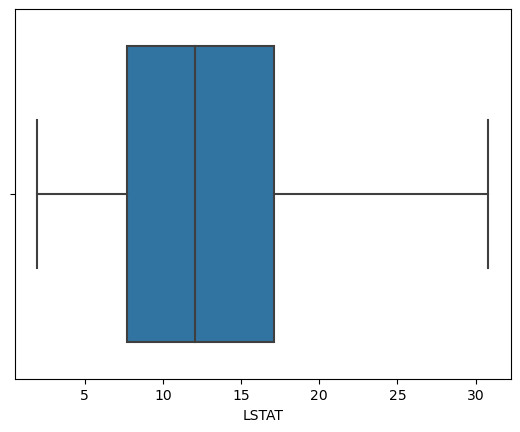

In [13]:
plt.figure()
sns.boxplot(data1_o_iqr['LSTAT'])
_=plt.plot()

In [14]:
X=data1_o_iqr['LSTAT'].values.reshape(-1,1)
y=data1_o_iqr['MEDV'].values

In [15]:
lr1_o_iqr=LinearRegression()
lr1_o_iqr.fit(X,y)
lr1_o_iqr.score(X,y)

0.6087730602029618